<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/random_forest_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer Random Forest

## Importaciones, análisis exploratorio y limpieza

In [16]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#Cargamos dataset a utilizar
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [18]:
# Eliminando columnas innecesarias
titanic.drop(['Name', 'Fare'], axis=1, inplace=True)

# Renombrando columnas
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

# Convirtiendo variables categóricas en indicadoras/dummies
titanic = pd.get_dummies(titanic, columns=["Sex"], drop_first=True)

# Renombrando la columna resultante de la conversión
titanic.rename(columns={'Sex_male': 'Sex'}, inplace=True)

# Reordenando columnas
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

# Mostrando las primeras filas del DataFrame modificado
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Preparación de Datos: Seleccionar solo las columnas 'Sex', 'Pclass', 'Age'
X = titanic[['Sex', 'Pclass', 'Age']]
y = titanic['Survived']

# Tratamiento de valores faltantes en 'Age'
X['Age'].fillna(X['Age'].mean(), inplace=True)

# 2. División del Conjunto de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Construcción del Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Validación y Ajuste de Hiperparámetros
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# 5. Evaluación del Modelo
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# 6. Generando reporte de clasificación y matriz de confusión
classification_report_train = classification_report(y_train, train_predictions)
classification_report_test = classification_report(y_test, test_predictions)
confusion_matrix_train = confusion_matrix(y_train, train_predictions)
confusion_matrix_test = confusion_matrix(y_test, test_predictions)

<ipython-input-19-78c256fd016e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


In [23]:
# 7. Preparando los resultados para mostrar
print("Cross-Validation Scores: \n", cv_scores)
print("Reporte de clasificación (Entrenamiento): \n", classification_report_train)
print("Reporte de clasificación (Prueba): \n", classification_report_test)
print("Matriz de confusión (Entrenamiento): \n", confusion_matrix_train)
print("Matriz de confusión (Prueba): \n", confusion_matrix_test)

Cross-Validation Scores: 
 [0.81460674 0.80898876 0.79661017 0.82485876 0.8079096 ]
Reporte de clasificación (Entrenamiento): 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       379
           1       0.87      0.75      0.80       241

    accuracy                           0.86       620
   macro avg       0.86      0.84      0.85       620
weighted avg       0.86      0.86      0.86       620

Reporte de clasificación (Prueba): 
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       166
           1       0.82      0.57      0.67       101

    accuracy                           0.79       267
   macro avg       0.80      0.75      0.76       267
weighted avg       0.79      0.79      0.78       267

Matriz de confusión (Entrenamiento): 
 [[352  27]
 [ 61 180]]
Matriz de confusión (Prueba): 
 [[153  13]
 [ 43  58]]


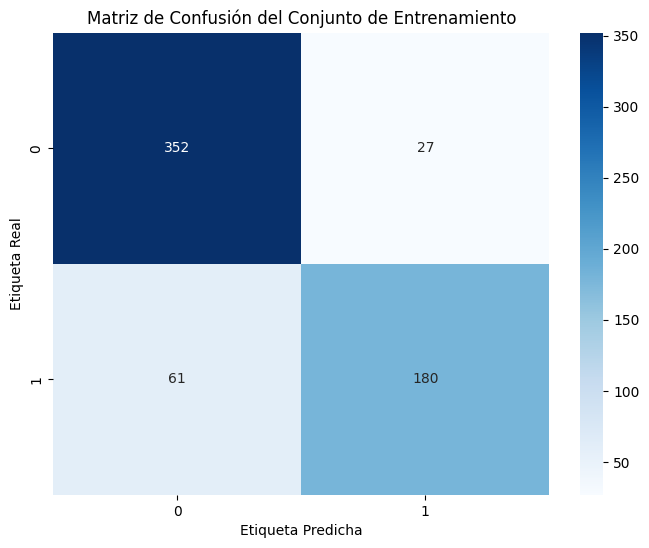

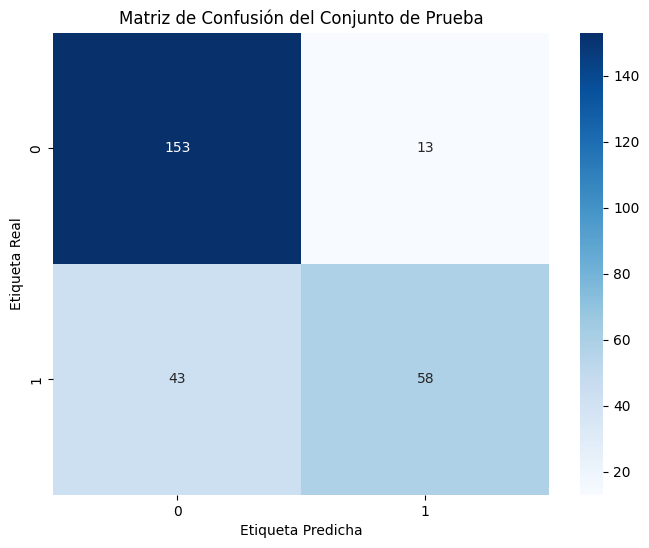

In [25]:
import seaborn as sns

# Crear un mapa de calor para la matriz de confusión del conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión del Conjunto de Entrenamiento")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

# Crear un mapa de calor para la matriz de confusión del conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión del Conjunto de Prueba")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

# Interpretación de Resultados
El análisis de los resultados obtenidos del modelo de Random Forest aplicado al conjunto de datos del Titanic revela varios puntos clave sobre su rendimiento:

1. **Puntajes de Validación Cruzada (Cross-Validation Scores)**: Los puntajes de validación cruzada están en el rango de aproximadamente 0.80 a 0.82, lo cual indica un buen rendimiento del modelo en diferentes subconjuntos del dataset. La consistencia en estos puntajes sugiere que el modelo no está sobreajustado y tiene una buena generalización en datos no vistos.

2. **Precisión en el Conjunto de Entrenamiento**: La precisión del modelo en el conjunto de entrenamiento es del 86%. Esto indica que, en el 86% de las ocasiones, el modelo pudo clasificar correctamente si un pasajero sobrevivió o no.

3. **Precisión en el Conjunto de Prueba**: La precisión disminuye ligeramente a 79% en el conjunto de prueba. Aunque hay una disminución, sigue siendo un buen indicador de que el modelo es capaz de generalizar a partir de los datos que no se utilizaron durante el entrenamiento.

4. **Recall y F1-Score**: El recall (capacidad del modelo para encontrar todas las instancias relevantes) y el F1-score (balance entre precisión y recall) son también buenos, aunque hay una ligera disminución en el conjunto de prueba. Esto es común en la práctica y sugiere que el modelo puede estar enfrentando algunas dificultades con casos más complejos o atípicos en el conjunto de prueba.

5. **Matriz de Confusión**: Al analizar las matrices de confusión, se puede observar que el modelo tiene una tendencia a predecir mejor la clase "No Sobrevivido" (clase 0) que la clase "Sobrevivido" (clase 1). Esto se evidencia en una mayor cantidad de verdaderos negativos (predicciones correctas de la clase 0) en comparación con verdaderos positivos (predicciones correctas de la clase 1), especialmente en el conjunto de prueba.

### Conclusión:
El modelo de Random Forest ha demostrado ser bastante bueno para este conjunto de datos. Ha logrado un buen balance entre precisión y recall, lo que sugiere una buena capacidad de generalización. Sin embargo, hay un ligero sesgo hacia predecir mejor la clase "No Sobrevivido", lo cual podría ser un área para explorar en futuros ajustes del modelo, posiblemente investigando más sobre el balance de las clases o ajustando los parámetros del modelo.

En general, estos resultados son prometedores y muestran que el modelo de Random Forest es una buena elección para este tipo de tarea de clasificación.